# Analisi del file CSV person_alternate_names

## Analisi

Analizzando il file notiamo come contenga una lista di nomi di persone.

In [2]:
import pandas as pd
personAN_df = pd.read_csv('person_alternate_names.csv')
personAN_df.head()

,person_mal_id,alt_name
0,1,Seki Mondoya
1,1,門戸 開
2,1,Monto Hiraku
3,3,雪野五月
4,10,Kevin Hatcher


Preso songolarmante non è molto chiaro a cosa corrisponda il person_mal_id, alcune volte un singolo id corrisponde ad una perona (una persona può avere piu nomi) ma altre volte l'id corrisponde a persone diverse (es id 12). Non è un file molto utile perchè contiene solo tutti i nomi di attori, musicisti ecc.

# Analisi del file CSV person_anime_works
## Analisi
Analizzando il file notiamo come contenga tutti i ruoli delle persone (presenti nel CSV precedente) e a quale anime id corrisponde.

In [7]:
personAW_df = pd.read_csv('person_anime_works.csv')
personAW_df.head()

,person_mal_id,position,anime_mal_id
0,1,Theme Song Performance,3080
1,1,Inserted Song Performance,15699
2,1,Theme Song Performance (OP),247
3,1,Theme Song Performance,258
4,1,Theme Song Performance (ED),34825


Si potrebbe visualizzare quali ruoli sono più necessari o presenti per la realizzazione degli anime

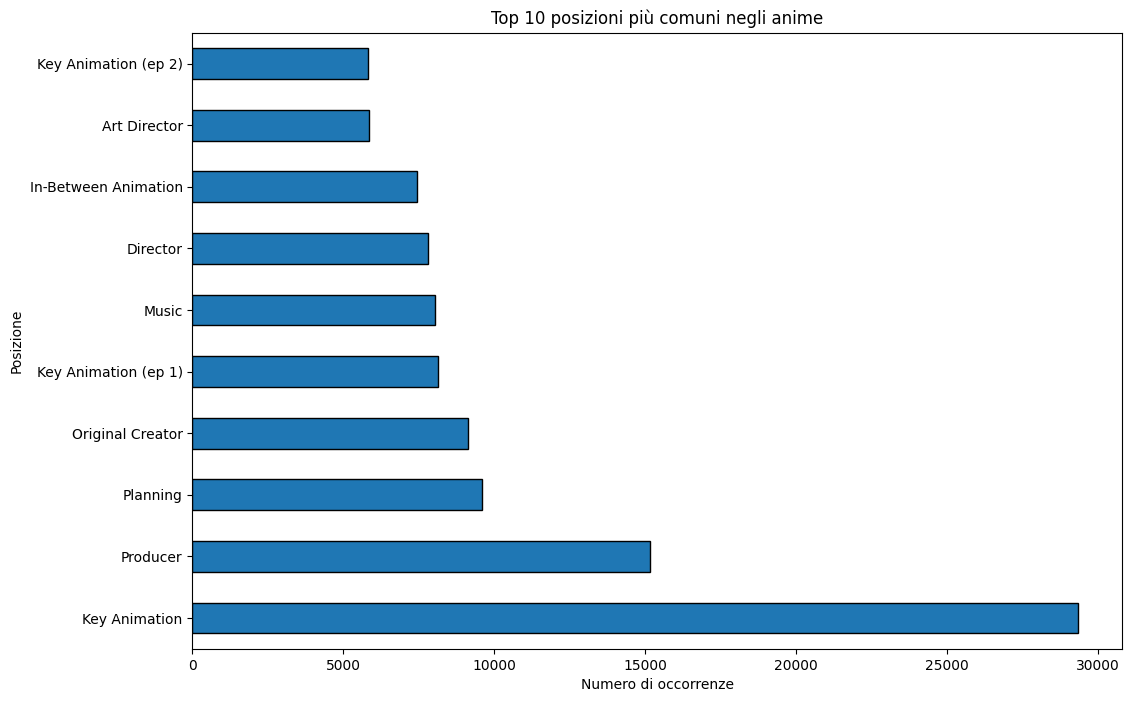

In [8]:
# Grafico delle posizioni più comuni (top 10)
plt.figure(figsize=(12, 8))
personAW_df['position'].value_counts().head(10).plot(kind='barh', edgecolor='black')
plt.title('Top 10 posizioni più comuni negli anime')
plt.xlabel('Numero di occorrenze')
plt.ylabel('Posizione')
plt.show()

Si può vedere le posizioni più comuni drante la realizzazione degli anime (non so quanto sia utile).

# Analisi del file CSV person_details
## Analisi
Analizzando il file notiamo come contenga una serie di informazioni relative ad una persona, come i vari nomi, la data di compleanno, da dove proviene, una foto ecc.

In [3]:
personD_df = pd.read_csv('person_details.csv')
personD_df.head()

,person_mal_id,url,website_url,image_url,name,given_name,family_name,birthday,favorites,relevant_location
0,1,https://myanimelist.net/people/1/Tomokazu_Seki,NaN,https://cdn.myanimelist.net/images/voiceactors...,Tomokazu Seki,智一,関,1972-09-08T00:00:00+00:00,6219,"Berlin, Germany"
1,2,https://myanimelist.net/people/2/Tomokazu_Sugita,https://agrs.co.jp/,https://cdn.myanimelist.net/images/voiceactors...,Tomokazu Sugita,智和,杉田,1980-10-11T00:00:00+00:00,47666,"Los Angeles, USA"
2,3,https://myanimelist.net/people/3/Satsuki_Yukino,NaN,https://cdn.myanimelist.net/images/voiceactors...,Satsuki Yukino,さつき,ゆきの,1970-05-25T00:00:00+00:00,1777,"Madrid, Spain"
3,4,https://myanimelist.net/people/4/Aya_Hirano,http://ayahirano.jp/,https://cdn.myanimelist.net/images/voiceactors...,Aya Hirano,綾,平野,1987-10-08T00:00:00+00:00,18374,"Paris, France"
4,5,https://myanimelist.net/people/5/Kenichi_Suzumura,https://intention-k.com,https://cdn.myanimelist.net/images/voiceactors...,Kenichi Suzumura,健一,鈴村,1974-09-12T00:00:00+00:00,5176,"Osaka, Japan"


E' abbastanza utile per porsi qualche domanda, come per esempio vedere la concentrazione di persone nate in determinati periodi (utile per trend generazionali). Oppure vedere i paesi più rappresentati per analizzare la distribuzione geografica.

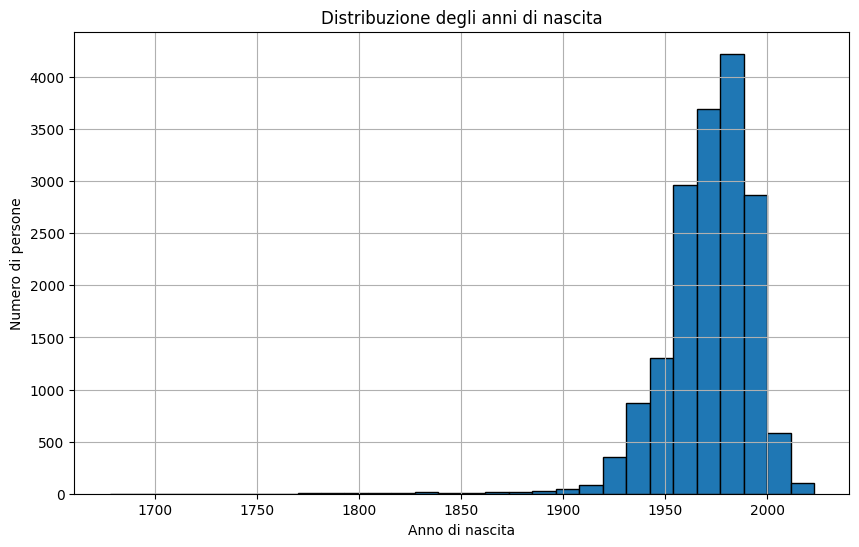

In [ ]:
import matplotlib.pyplot as plt

# Estrarre l'anno di nascita
personD_df['birth_year'] = pd.to_datetime(personD_df['birthday'], errors='coerce').dt.year

# Grafico
plt.figure(figsize=(10, 6))
personD_df['birth_year'].dropna().hist(bins=30, edgecolor='black')
plt.title('Distribuzione degli anni di nascita')
plt.xlabel('Anno di nascita')
plt.ylabel('Numero di persone')
plt.show()

Possimao notare come la conentrazione delle nascite è avvenuta nella seconda metà degli anni 50. Da qui si può anche supporre che il boom degli anime è avvenuto poco prima degli anni 2000.

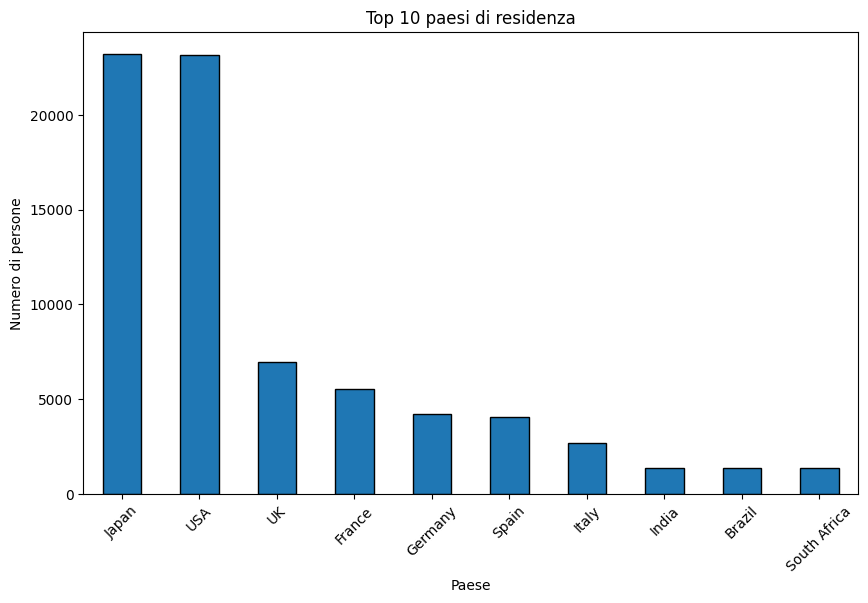

In [ ]:
# Estrarre il paese da relevant_location
personD_df['country'] = personD_df['relevant_location'].str.split(',').str[-1].str.strip()

# Grafico (top 10)
plt.figure(figsize=(10, 6))
personD_df['country'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 paesi di residenza')
plt.xlabel('Paese')
plt.ylabel('Numero di persone')
plt.xticks(rotation=45)
plt.show()

Da questo grafico invece possiamo capire le perosne da quali paesi principalmente sono nate e possiamo dire con certezza che il giappone e gli stati uniti hanno un netto distacco rispetto agli altri paesi (l'italia è 7° nel mondo).

# Analisi del file CSV person_details
## Analisi
Analizzando il file notiamo come contenga dei dati riguardanti determinate perosone, ovvero il ruolo del perosnaggio che hanno doppiato e in che lingua.

In [10]:
personVW_df = pd.read_csv('person_voice_works.csv')
personVW_df.head()

,person_mal_id,role,anime_mal_id,character_mal_id,language
0,1,Main,55830,2514,Japanese
1,1,Supporting,60602,2822,Japanese
2,1,Supporting,59229,140499,Japanese
3,1,Supporting,60427,275856,Japanese
4,1,Supporting,62067,190335,Japanese


Da quetso file possiamo chiederci in quali lingue vengono doppiati di più i personaggi

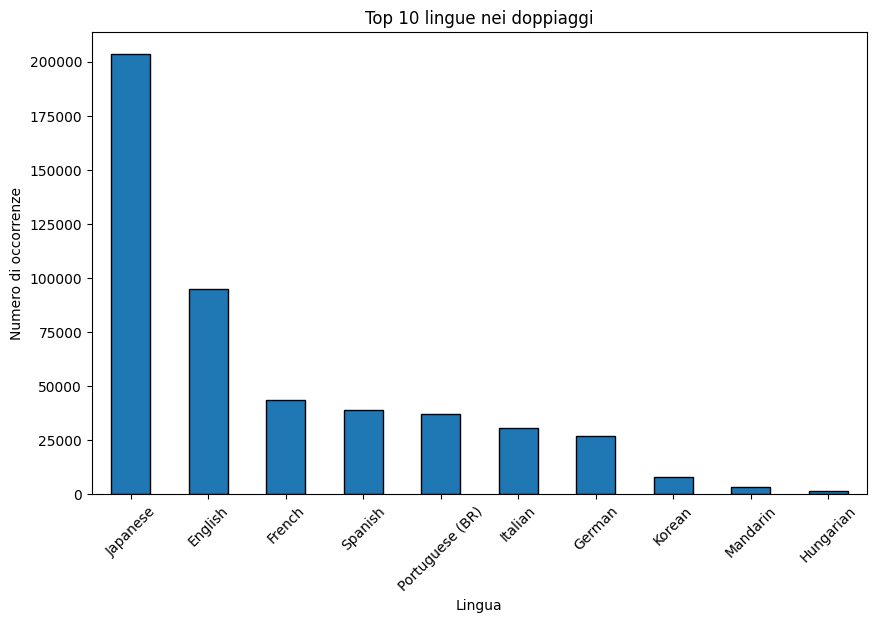

In [11]:
# Grafico delle lingue più comuni nei doppiaggi
plt.figure(figsize=(10, 6))
personVW_df['language'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 lingue nei doppiaggi')
plt.xlabel('Lingua')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=45)
plt.show()

Da questo grafico possiamo notare i doppiaggi in quali lingue sono state effetuete, il giappone è sempre in cima alla classifica, però si può notare anche le posizioni dei paesi rispecchiano anche quelle presente nel precedente csv.